# <span style="color:green">CHAPTER 2</span> <u>머신러닝 프로젝트 처음부터 끝까지</u>
### 이 장에서는 부동산 회사에 막 고용된 데이터 과학자라는 가정하에 예제 프로젝트를 진행

#### 진행할 주요 단계
- 큰 그림을 봅니다.
- 데이터를 구합니다.
- 데이터로부터 통찰을 얻기 위해 탐색하고 시각화합니다.
- 머신러닝 알고리즘을 위해 데이터를 준비합니다.
- 모델을 선택하고 훈련시킵니다.
- 모델을 상세하게 조정합니다.
- 솔루션을 제시합니다.
- 시스템을 론칭하고 모니터링하고 유지 보수합니다.
---
## <span style="color:green">CHAPTER 2.1 실제 데이터로 작업하기</span>
머신러닝을 배울 때는 인공적으로 만들어진 데이터셋이 아닌 실제 데이터로 실험해보는 것이 좋습니다.<br>
- 유명한 공개 데이터 저장소
    - UC 얼바인 머신러닝 저장소
    - 캐글 데이터셋
    - 아마존 AWS 데이터셋
- 메타 포털(공개 데이터 저장소가 나열되어 있습니다.)
    - 데이터 포털
    - 오픈 데이터 모니터
    - 퀀들
- 인기 있는 공개 데이터 저장소가 나열되어 있는 다른 페이지
    - 위키백과 머신러닝 데이터셋 목록
    - Quora.com
    - 데이터셋 서브레딧


이 중에서 저희는 StatLib 저장소에 있는 캘리포니아 주택 가격 데이터셋을 사용하게됩니다.
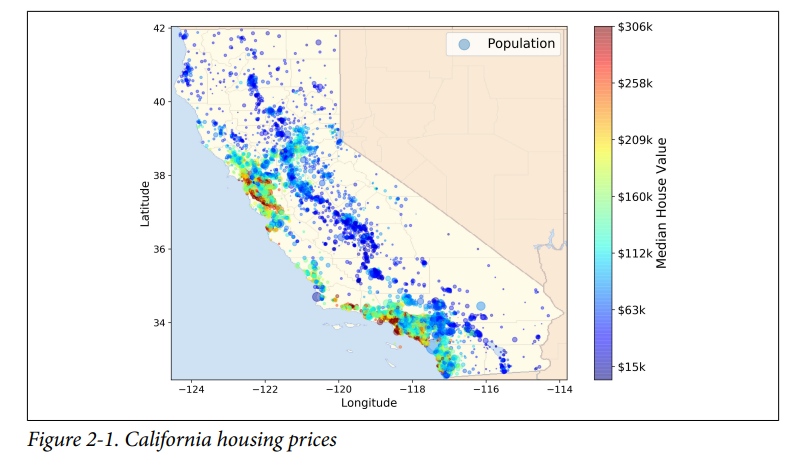

---
## <span style="color:green">CHAPTER 2.2 큰 그림 보기</span>
맨 처음, 캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만드는 것입니다.<br>
이 데이터란, 캘리포니아 블록 그룹마다의 인구, 중간 소득, 중간 주택 가격 등을 담고 있는 캘리포니아 인구조사 데이터를 의미합니다.<br>
추후, 이 데이터로 모델을 학습시켜서 다른 측정 데이터가 주어졌을 때 구역의 중간 주택 가격을 예측해야 합니다.<br>

---

### <span style="color:royalblue">CHAPTER 2.2.1 문제 정의</span>

1. 비지니스의 목적이 정확히 무엇인가요?<br>
    목적을 아는 것은 문제를 어떻게 구성할지, 어떤 알고리즘을 선택할지, 모델 평가에 어떤 성능 지표를 사용할지, 모델 튜닝을 위해 얼마나 노력을 투여할지 결정하기 때문에 아주 중요합니다.
2. 현재 솔루션은 어떻게 구성되어 있나요?(만약 있다면)<br>
    현재 상황은 문제 해결 방법에 대한 정보는 물론이고 참고 성능으로도 사용할 수 있습니다.

이처럼 목적과 현재 상황은 이와 같이 중요한 요소가 되므로 충분히 고려 후 진행하는 것이 좋습니다.<br>
이러한 정보를 토대로, 시스템을 설계하기 위해 먼저 문제를 정의해야 합니다.

1. 지도학습인가, 비지도 학습인가, 강화 학습인가?<br>
    현재 레이블된 훈련 샘플이 있으니(각 샘플이 기대 출력값, 즉 구역의 중간 주택 가격을 가지고 있습니다) 이는 전형적인 지도 학습 작업입니다.
2. 분류인가 회귀인가?<br>
    값을 예측해야 합니다. 또한, 예측에 사용할 특성이 여러개(구역의 인구, 중간 소득 등) 이므로 다중 회귀 문제입니다.
    각 구역마다 하나의 값(구역의 중간 주택 가격)을 예측하므로 단변량 회귀입니다.(만약 여러 값을 예측한다면 다변량 회귀가 될 것입니다.)
3. 배치 학습을 이용해야하는가, 온라인 학습을 이용해야 하는가?<br>
    이 시스템으로 들어오는 데이터에 연속적인 흐름이 없으므로 빠르게 변하는 데이터에 적응하지 않아도 되고, 데이터가 메모리에 들어갈 만큼 충분히 작으므로 일반적인 배치 학습이 적절합니다.
---
### <span style="color:royalblue">CHAPTER 2.2.2 성능 측정 지표 선택</span>
- 다음 단계는 성능  측정 지표를 선택하는 것입니다. 회귀 문제의 전형적인 성능 지표는 평균 제곱근 오차(RMSE)입니다.<br>
- 오차가 커질수록 이 값은 더욱 커지므로 예측에 얼마나 많은 오류가 있는지 가늠하게 해줍니다.
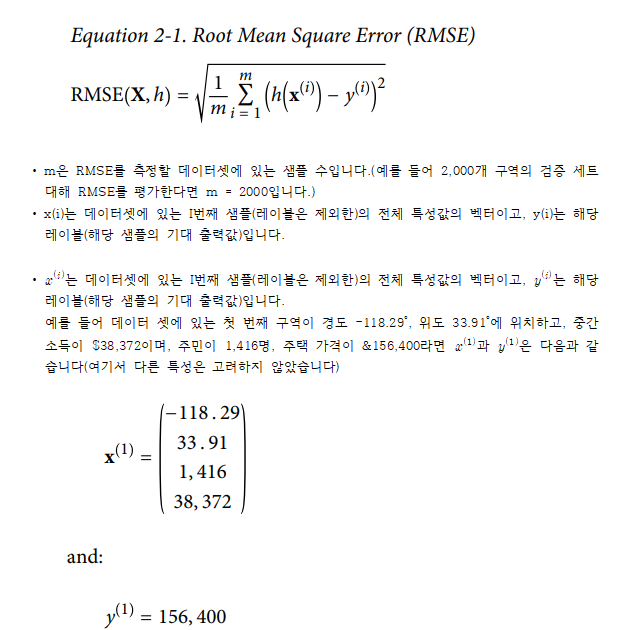


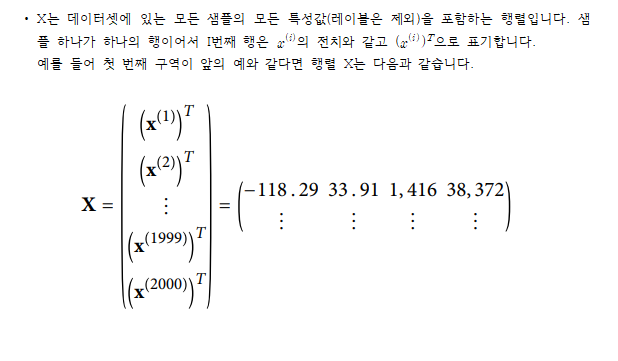

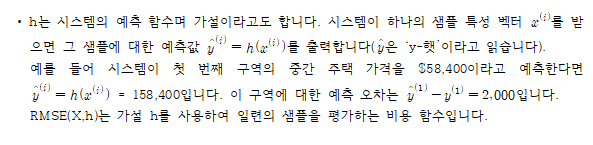

- RMSE가 일반적으로 회귀 문제에 선호되는 성능 측정 방법이지만 경우에 따라 다른 함수를 사용할 수 도 있습니다.<br>
- 예를 들어이상치로 보이는 구역이 많다고 가정하면, 평균 절대 오차를 고려해볼 수 있습니다.
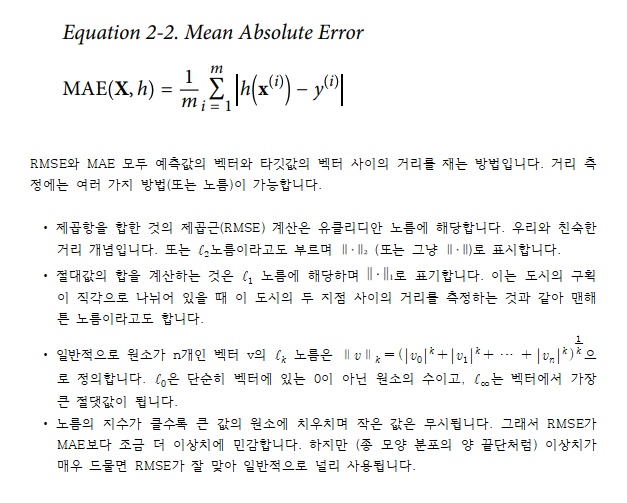

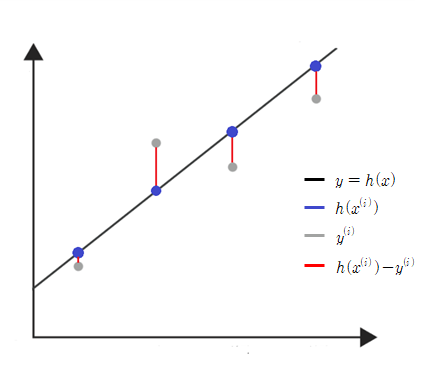

---
### <span style="color:royalblue">CHAPTER 2.2.3 가정 검사</span>

예를 들어, 시스템이 출력한 구역의 가격이 다음 머신러닝 시스템의 입력으로 들어가게 되는데 이 값이 있는 그대로 사용될 거라 가정했습니다. 하지만 하위 시스템에서 이 값을 ('저렴', '보통', '고가' 같은) 카테고리로 바꾸고 가격대신 카테고리를 사용하면 어떻게 될까요? 이럴 때는 정확한 가격을 구하는 것이 전혀 중요하지 않습니다. 올바른 카테고리를 구하는 시스템이 필요합니다. 그렇다면 이제 이 문제는 회귀가 아니라 분류 작업이 됩니다. 몇 달 동안 회귀 시스템을 구축하고 나서야 이런 사실을 깨닫게 되는 것을 아무도 원치 않을 것입니다. 다행히도 하위 시스템을 담당하는 팀과 대화 후 그들이 카테고리가 아니라 실제 가격을 사용한다는 것을 확인했습니다.
이와 같이 만든 가정을 나열하고 검사해보는 것이 좋습니다.(심각한 문제를 일찍 발견할 수 있습니다.)

---
## <span style="color:green">CHAPTER 2.3 데이터 가져오기</span>
이제 직접 코드를 진행할 수 있는 단계입니다.

---

### <span style="color:royalblue">CHAPTER 2.3.1 작업환경 만들기</span>
- 먼저 파이썬이 설치되어 있어야 합니다.(저희는 이미 설치되어 있습니다.)
- 머신러닝 코드와 데이터셋을 저장할 작업 디렉터리를 만듭니다.(터미널에 다음 명령을 실행합니다.)
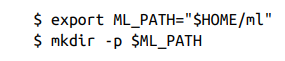

- 파이썬에는 필요한 패키지가 많습니다. 주피터, 넘파이, 판다스, 맷플롯립, 사이킷런 등입니다.(간단히 확인해보겠습니다.)
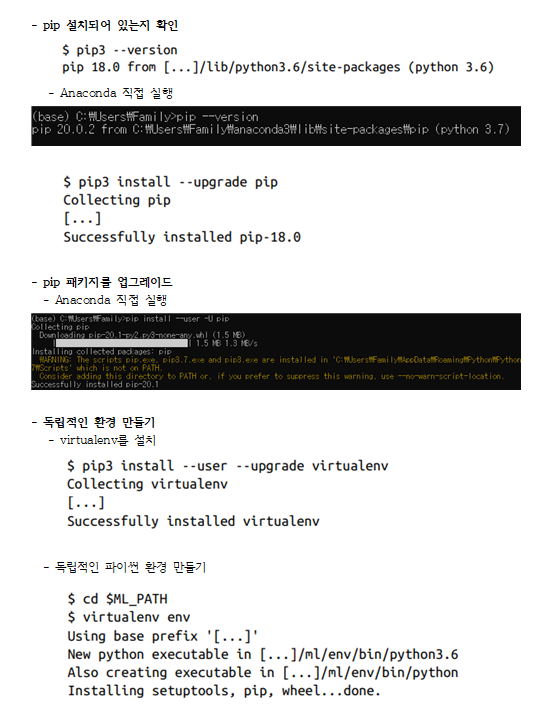

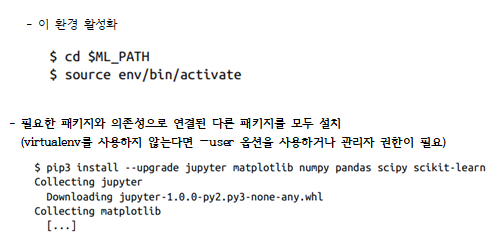

- 그 후 주피터 노트북 실행 후 확인합니다.
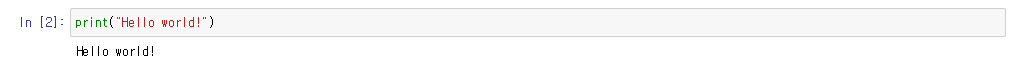

---
### <span style="color:royalblue">CHAPTER 2.3.2 데이터 다운로드</span>
보통 저희가 다룰 데이터는 관계형 데이터베이스(또는 다른 데이터 저장소)에 들어있고 여러 테이블, 문서, 파일로 나뉘어 있을 것입니다.<br>
이런 데이터에 접근하려면 먼저 보안자격과 접근 권한이 있어야 하고 그 데이터의 구조를 잘 알고 있어야 합니다.<br>
현재 이 프로젝트에서 다룰 데이터는 CSV 파일로 housing.csv를 압축한 housing.tgz 파일을 내려받기만 하면 됩니다.<br>

- fetch_housing_data()를 호출하면 현재 작업공간에 datasets/housing 디렉터리를 만듭니다.<br>
- housing.tgz 파일을 내려받고 같은 디렉터리에 압축을 풀어 housing.csv 파일을 만듭니다.<br>

In [1]:
import os
import tarfile
import urllib

# 루트 설정
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/" 
HOUSING_PATH = os.path.join("datasets", "housing") 
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): # 해당 위치(HOUSING_PATH)에 디렉터리 존재안할시 생성
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) # urllib.request.urlretrieve을 이용한 다운로드
    housing_tgz = tarfile.open(tgz_path) # housing.tgz 파일 오픈
    housing_tgz.extractall(path=housing_path) # housing.tgz 파일 압축해제
    housing_tgz.close()

In [2]:
fetch_housing_data()

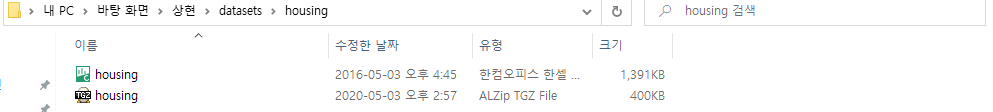

- 이 함수는 모든 데이터를 담은 판다스의 데이터프레임 객체를 반환합니다.

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path) # pd.read_csv를 통해 csv파일을 읽습니다.

---
### <span style="color:royalblue">CHAPTER 2.3.3 데이터 훑어보기</span>
#### 설정
- 프로젝트 전 모듈을 임포트하여 설정을 합니다

In [4]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

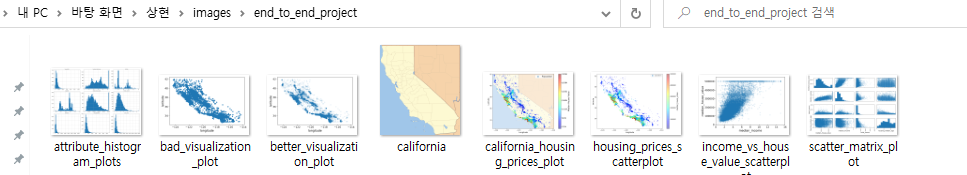

---

- DataFrame의 head() 메서드를 사용해 처음 다섯 행을 확인해보겠습니다.
    - 각 행은 하나의 구역을 나타냅니다. 특성은 longitude, latitude, housing_median_age, total_rooms, total_bedrooms .... 등으로 10개입니다.



In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


---

info() 메서드는 데이터에 대한 간략한 설명과 특히 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인하는 데 유용합니다.
- 확인할 수 있는 정보
    - 데이터셋에 20,640개의 샘플
    - total_bedrooms 특성의 경우 20,433개로 207개의 구역은 이 특성을 가지고 있지 않음
    - ocean_proximity 필드만 빼고 모든 특성이 숫자형(float64)<br>
      ocean_proximity의 경우 object이므로 어떤 파이썬 객체도 가능하지만 csv 파일에서 읽어 들였기 때문에 텍스트 특성으로 추측<br>
      또한, 처음 다섯행을 출력했을 때 NEAR BAY로 반복되는 것으로 보아서 이 특성은 아마도 범주형임

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


---

- value_count() 메서드를 통해 각 카테고리마다 얼마나 많은 구역이 있는지 확인<br>
(20640개의 ocean_proximity의 값 중 해당 카테고리의 value 값을 count함)

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

---

숫자형 특성의 요약 정보를 보여주는 describe()메서드 이용
- count : 개수
- mean : 평균값
- std : 값이 퍼져있는 정도를 나타내는 표준편차
- min : 최소값
- 25%, 50%, 75% : 전체 관측값에서 주어진 백분율이 속하는 하위 부분의 값
- max : 최대값

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


---

데이터의 형태를 빠르게 검토하는 다른 방법으로는 히스토그램을 그리는 것이 있습니다.<br>
각 숫자형 특성을 히스토그램으로 그리는 것을 나타냅니다.<br>
주어진 값의 범위(수평축)에 속한 샘플 수(수직축)를 나타냅니다.<br>
특성마다 따로 히스토그램을 그릴 수 있고(다음 코드 예제처럼) 전체 데이터셋에 대해 hist() 메서드를 호출하면 모든 숫자형 특성에 대한 히스토그램을 출력합니다.

이 히스토그램에서 확인할 수 있는 사항들
- 중간 소득 특성이 US 달러로 표현되어 있지 않음(상한이 15, 하한이 0.5가 되도록 만듬)<br> 대략 수만달러를 나타냅니다(3은 실제로 약 30,000 달러를 의미)<br> 머신러닝에서는 전처리된 데이터를 다루는 경우가 흔하고 이것이 문제가 되지는 않지만 데이터가 어떻게 계산된 것인지 반드시 이해하고 있어야함


- 중간 주택 연도와 중간 주택 가격 역시 최댓값과 최솟값을 한정<br> 중간 주택 가격의 경우 타깃 속성(레이블)으로 사용되기 때문에 가격이 한계값을 넘어가지 않도록 머신러닝 알고리즘이 학습되어 심각한 문제가 될 가능성이 존재<br> 실제 문제가 될 사항인지는 클라이언트 팀과 함께 검토<br> 만약 그 팀에서 현재 여기서 정한 한계 값인 $50,000을 넘어가더라도 정확한 예측값을 요구하도록 한다면, 2가지 방법이 존재
    - 한곗값 밖의 구역에 대한 정확한 레이블을 구함
    - 훈련 세트에서 이런 구역을 제거
    

- 특성들의 스케일이 많이 다르다.


- 가운데를 기준으로 왼쪽보다 오른쪽으로 더 멀리 뻗어있다.<br> 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만듦

그림 저장: attribute_histogram_plots


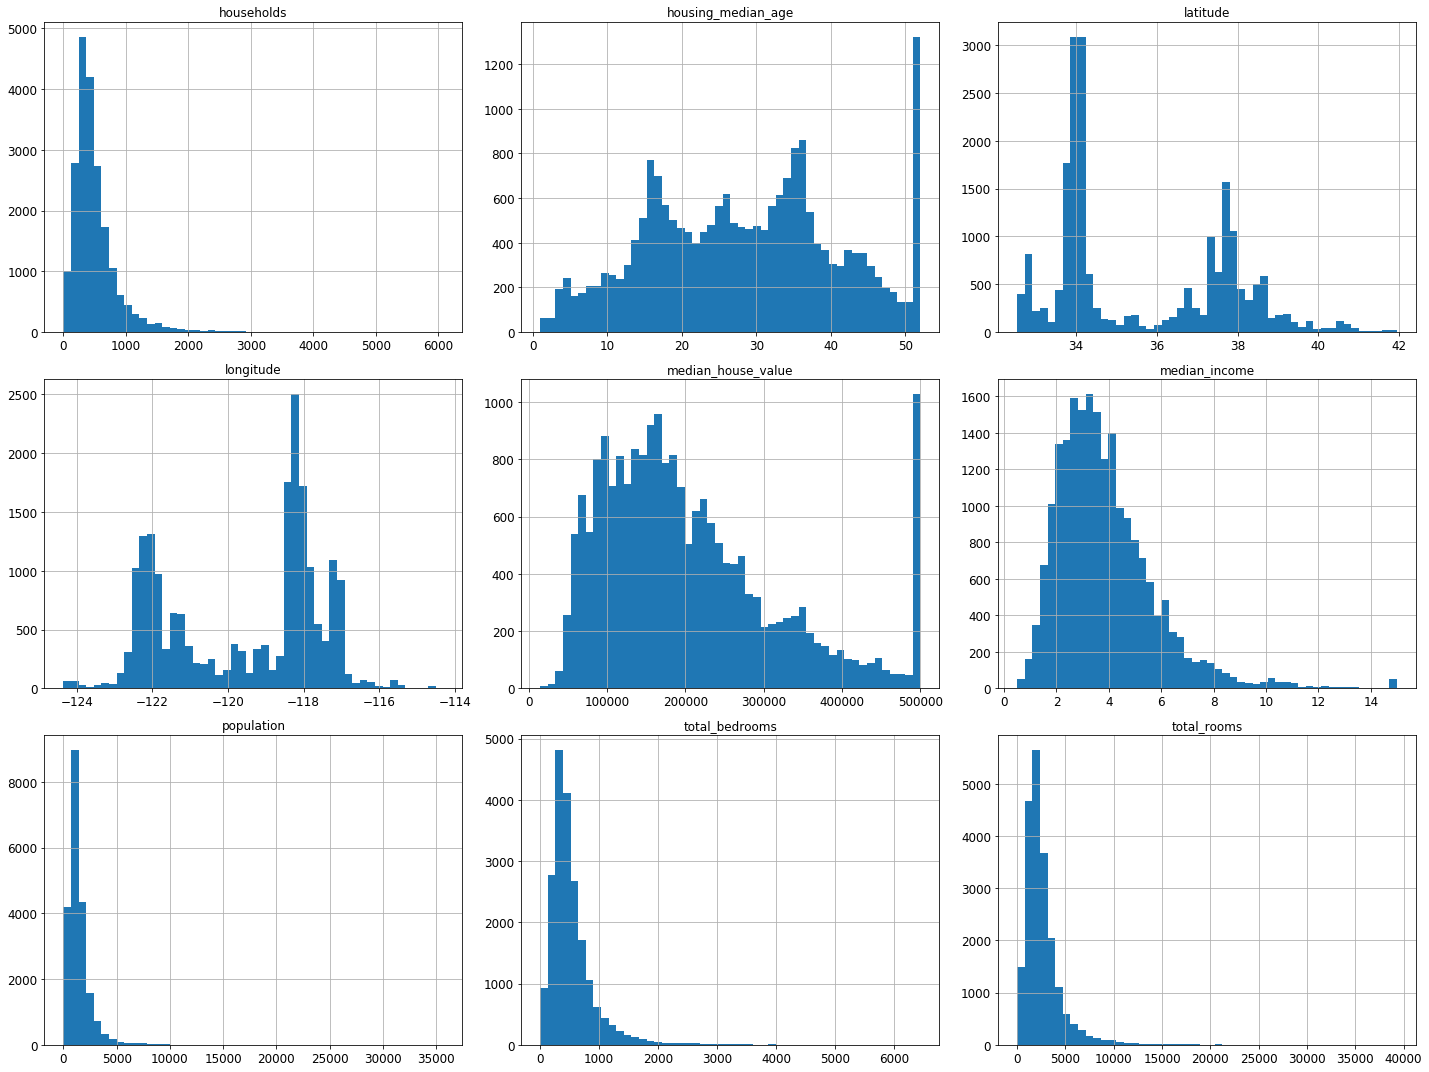

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

---
### <span style="color:royalblue">CHAPTER 2.3.4 테스트 세트 만들기</span>
우리 뇌는 매우 과대적합되기 쉬운 엄청난 패턴 감지 시스템입니다. 만약 테스트 세트를 들여다본다면 테스트 세트에서 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모릅니다. 이 테스트 세트로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 않을 것입니다. 이를 데이터 스누핑 편향이라고 합니다.

테스트 세트를 생성하는 것은 무작위로 어떤 샘플을 선택하고 데이터셋의 20% 정도(또는 데이터셋이 매우 크다면 그보다 적게)를 떼어놓으면 됩니다.

In [10]:
# 노트북의 실행 결과가 동일하도록 랜덤 시드값 설정
np.random.seed(42)

In [11]:
import numpy as np

# 예시로 만든 것입니다. 실전에서는 사이킷런의 train_test_split()를 사용하세요.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


In [13]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

위에 실행한 np.random.seed(42)를 하지 않았을 경우, 실행할 때마다  다른 테스트 세트가 생성되어 결국 전체 데이터셋을 보게됩니다.<br> 이를 방지하기 위해서는 np.random.permutation()을 호출하기 전에 위와같이 np.random.seed()를 통해 시드값을 지정해주는 것입니다.(난수 발생기의 초깃값을 설정)<br> 다른 방법으로는 처음 실행에서 테스트 세트를 저장하고 다음번 실행에서 이를 불러오는 것입니다.<br>


하지만 이 두해법 모두 다음번에 업데이트된 데이터셋을 사용하려면 문제가 됩니다.<br> 데이터를 업데이트한 후에도 안정적인 훈련/테스트 분할을 위한 일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트로 보낼지 말지 정하는것입니다.<br> 여기서는 샘플이 고유하고 변경 불가능한 식별자를 가지고 있다고 가정하여 식별자의 해시값을 계산하여 해시 최댓값의 20%보다 작거나 같은 샘플을 테스트 세트로 보내는 방식을 구현하였습니다.

In [14]:
from zlib import crc32
import hashlib
'''
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
'''
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

---

- 현재 사용하는 데이터 주택 데이터셋에는 식별자 컬럼이 없습니다.<br> 대신 행의 인덱스를 ID로 사용하여 이를 적용해보겠습니다.

In [15]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

---

- 행의 인덱스를 고유 식별자로 사용할 때 새 데이터는 데이터셋의 끝에 추가되어야 하고 어떤 행도 삭제되지 않아야 합니다. <br> 이것이 불가능할 땐 고유 식별자를 만드는 데 안전한 특성을 사용해야 합니다. <br>예를 들어 구역의 위도와 경도는 몇백년 후까지 안정적이라고 보장할 수 있으므로 두 값을 연결하여 다음과 같이 ID를 만들 수 있습니다.

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

---

- 사이킷런에서 제공하는 방법을 이용하여 데이터셋을 여러 서브셋으로 나누는 것을 보여줍니다.<br> 이는 train_test_split으로, split_train_test와 아주 비슷하지만 두 가지 특징이 있습니다.
    - 앞서 설명한 난수 초깃값을 지정할 수 있는 random_state 매개변수가 있습니다.
    - 행의 개수가 같은 여러개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있습니다.<br>
  (데이터프레임이 레이블에 따라 여러 개로 나뉘어 있을 때 매우 유용)

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


---

- 지금까지는 순수한 무작위 샘플링 방식을 살펴보았습니다.<br>
데이터셋이 충분히 크다면 일반적으로 괜찮지만, 샘플링 편향이 발생할 가능성이 있습니다.<br>
샘플링 편향이란, 테스트 세트가 전체를 대표하지 못하고 어떠한 계층에 편향되어 있다는 것을 의미합니다.<br>
따라서, 우리는 샘플에서 전체를 대표할 수 있도록 어떠한 계층에 편향되지 않고 적절한 비율을 유지할 수 있어야합니다.<br>
(예시로, 1000명 중 여성이 51.3% 남성이 48.7%라면 여성은 513명, 487명)


- 현재 이 프로젝트에서 전문가가 중간 소득이 중간 주택 가격을 예측하는 데 매우 중요하다고 이야기해주었다고 가정을 했습니다.<br>
이 경우 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 합니다.<br>
중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야합니다.<br>
중간 소득의 히스토그램을 조금 더 자세히 살펴보도록하겠습니다.

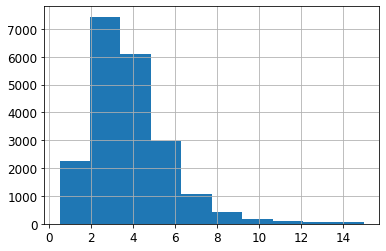

In [18]:
housing["median_income"].hist()

    1. 중간 소득 대부분은 1.5 ~ 6 (15,000, 60,000) 사이에 몰려 있지만 일부는 $60,000를 넘기도 합니다. 
    2. 계층별로 데이터셋에 충분한 샘플 수가 있어야 합니다. 그렇지 않으면, 계층의 중요도를 추정하는데 편향이 발생할 것입니다. 
       이 말은 너무 많은 계층으로 나누면 안되고 계층이 충분히 커야 한다는 것입니다.




- pd.cut()함수를 사용해 카테고리 5개를 가진 소득 카테고리 특성을 만듭니다.<br>
이는 1 ~ 5을 의미하고 각각이 1.5이하 1.5 ~ 3, 3 ~ 4.5, 4.5 ~ 6, 6이상을 의미합니다.

In [19]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

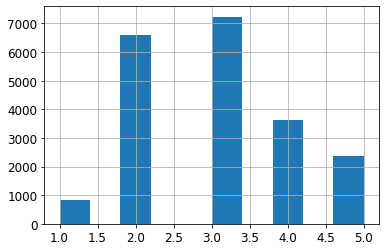

In [20]:
housing["income_cat"].hist()

- 각 구간에 해당하는 값들 개수를 확인합니다

In [21]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

---

- 5개로 나뉜 소득 카테고리를 기반으로 계층 샘플링을 할 준비가 되었습니다.<br>
이제 사이킷런의 StratifiedShuffleSplit를 사용할 수 있습니다.

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

- 이는 각각의 테스트 세트의 값들을 전체 테스트 세트의 개수로 나눔으로써, 소득 카테고리의 비율을 살펴봅니다.

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

- 이는 각각의 전체 데이터 세트의 값들을 전체 데이터세트 세트의 개수로 나눔으로써, 소득 카테고리의 비율을 살펴봅니다.
    - 테스트 세트에서의 비율값과 전체 데이터세트에서의 비율값을 비교해보면 얼추 비슷한 값을 보여주는 것을 확인할 수 있습니다.

In [24]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

- 전체 데이터 셋, 계층적 샘플링, 무작위 샘플링의 비율을 확인하기 위해 비율값을 구하는 공식을 함수화하고 이를 이용해 pandas에서 dataframe을 구성
    - 계층적 샘플링과 전체 데이터 셋의 소득 카테고리의 비율은 비슷한 것을 볼수 있습니다.<br>
    - 그에 비해 무작위 샘플링과 전체 데이터셋의 소득 카테고리의 비율은 차이가 큰 것을 볼 수 있습니다. <br>
    - 따라서 테스트 세트의 생성은 중요한 부분이라는 것을 확인할 수 있습니다.

In [25]:
def income_cat_proportions(data): # 위에 활용한 비율값 구하는 공식을 함수화
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) #  사이킷런을 통해 split

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing), # 전체 데이터셋
    "Stratified": income_cat_proportions(strat_test_set), # 테스트 데이터 셋
    "Random": income_cat_proportions(test_set), # 무작위 샘플링
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [26]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


- income_cat 특성을 삭제해서 데이터를 원래 상태로 되돌렸습니다.

In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

---
## <span style="color:green">CHAPTER 2.4 데이터 이해를 위한 탐색과 시각화</span>
지금까지 다뤄야 할 데이터의 종류를 파악하기 위해 데이터를 살펴보았습니다. <br>
이제 조금 더 깊이 파악하도록 하겠습니다.<br>
여기서는 훈련 세트의 복사본을 통해 진행하겠습니다.

In [28]:
housing = strat_train_set.copy()

---
### <span style="color:royalblue">CHAPTER 2.4.1 지리적 데이터 시각화</span>
- 지리 정보(위도와 경도)로 모든 구역을 산점도로 만들어 데이터를시각화해주겠습니다.

그림 저장: bad_visualization_plot


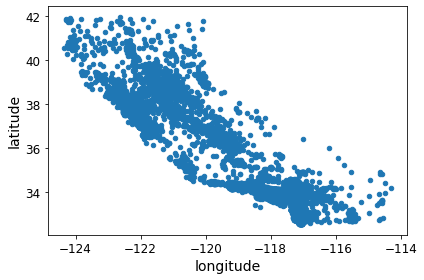

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

   - 캘리포니아 지역을 잘 나타내지만 특별한 패턴을 찾기는 힘들기 때문에, alpha 옵션을 추가로 주어 데이터 포인트가 밀집된 영역을 표시합니다.
   - 베이 에어리어, 로스앤젤레스 근처, 샌디에고의 지역들이 밀집되어 있습니다.
       - 경도 -122 근처가 베이 에어리어 지역, 경도 -118 근처가 로스앤젤레스, -117근처가 샌디에고 지역 
   - 센트럴 밸리 특히 새크라 멘토와 프레즈노 근처를 따라 밀집된 지역이 긴 띠를 이루고 있습니다.
       - 위도 38.5, 경도 -121.5 근처가 새크라멘토, 위도 36.7, 경도 -119.8 근처가 프레즈노

그림 저장: better_visualization_plot


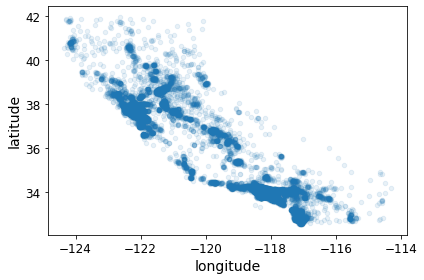

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

- 이번엔 지리정보가 아닌, 주택 가격을 살펴보겠습니다.
    - 원의 반지름은 구역의 인구를 나타냅니다.(s)
    - 색상은 가격을 나타냅니다.(c)
    - 주택 가격을 나타내기 위해 파란색(낮은 가격)에서 빨간색(높은 가격)까지 범위를 가지는 jet을 사용합니다.(cmap)
    - 여기에 군집 알고리즘을 사용해 주요 군집을 찾고 군집의 중심까지의 거리를 재는 특성을 추가할 수 있습니다.

=> <u>주택 가격은 지역과 인구 밀도에 관련이 매우 크다는 사실을 알 수 있습니다.</u>

그림 저장: housing_prices_scatterplot


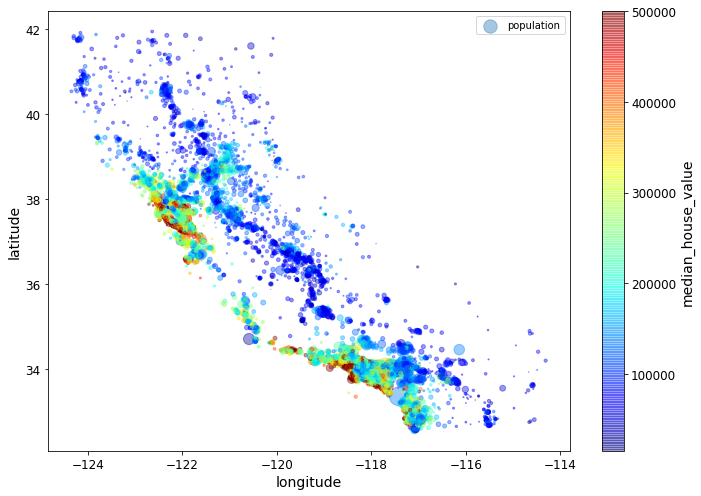

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

---

- 책에 나와있지는 않지만, 처음부분에서 보여드린 캘리포니아주택의 주택가격 사진을 실제로 구현하는 예제입니다.

In [32]:
# 캘리포니아 이미지를 다운로드합니다.
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x226058abbc8>)

그림 저장: california_housing_prices_plot


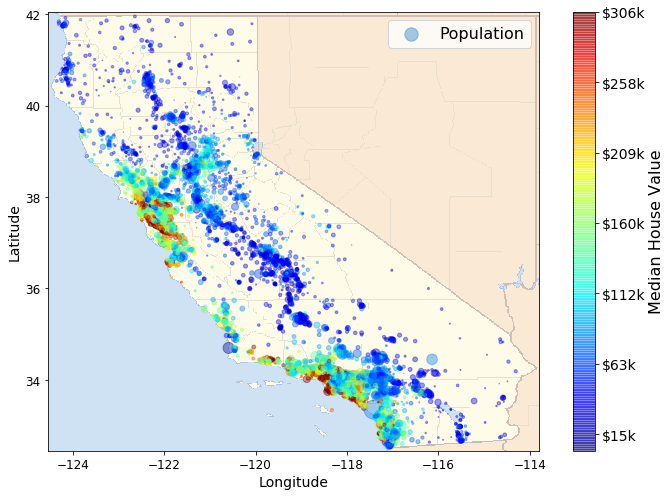

In [33]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

---
### <span style="color:royalblue">CHAPTER 2.4.2 상관관계 조사</span>
- 데이터셋이 너무 크지 않으므로 모든 특성 간의 표준 상관계수를 corr() 메서드를 이용해 계산하겠습니다.
---

- 상관관계란, 범위는 -1 ~ 1까지이며, 1에 가까우면 강한 양의 상관관계를 가진다는 뜻입니다.<br> 
    - 예를 들어, 중간 주택 가격은 중간 소득이 올라갈 때 증가하는 경향이 있습니다.
- 계수가 -1에 가까우면 강한 음의 상관관계를 나타냅니다.
    - 양의 상관관계 경우의 반대입니다.
- 계수가 0에 가까우면 선형적인 상관관계가 없다는 뜻입니다.
- 상관계수는 선형적인 상관관계만 측정합니다.
    - 마지막 줄에 있는 그래프들은 두 축이 완전히 독립적이지 않음에도 상관계수가 0입니다.(비선형관계)
- 두 번째 줄은 상관계수가 1이거나 -1인 경우입니다.
- 상관계수는 기울기와 상관없습니다.
    - 인치 단위의 키는 피트나 나노미터 단위의 키와 상관계수가 1입니다.
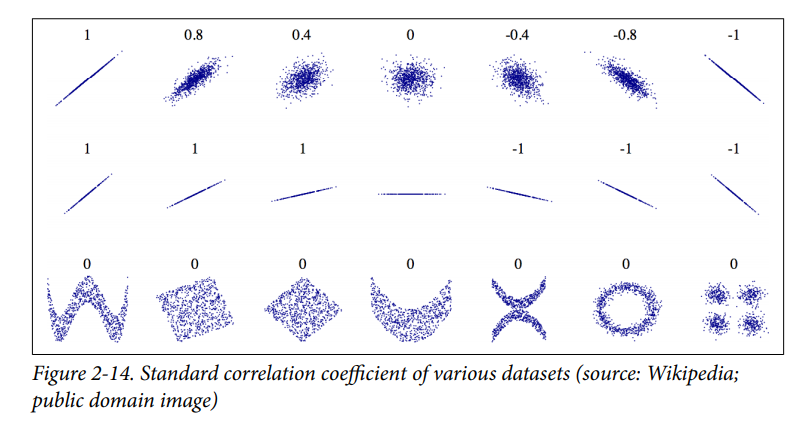


- 실제 corr()함수를 이용하여 계산한 값을 나타내겠습니다.
    - median_house_value와 나머지와의 상관계수

In [34]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

---

- 특성 사이의 상관관계를 확인하는 다른 방법인 scatter_matrix 함수를 사용한 것 입니다.
    - 중간 주택 가격과 상관관계가 높아보이는 몇가지 특성만 출력했습니다.
- scatter_matrix 함수란, 숫자형 특성 사이에 산점도를 그려주는 판다스 함수입니다.
- 출력되는 결과에서 대각선 방향(왼쪽 위에서 오른쪽 아래로)은 각 변수 자신에 대한 것이라, 직선이 되므로 이곳에 각 특성의 히스토그램을 그립니다.

그림 저장: scatter_matrix_plot


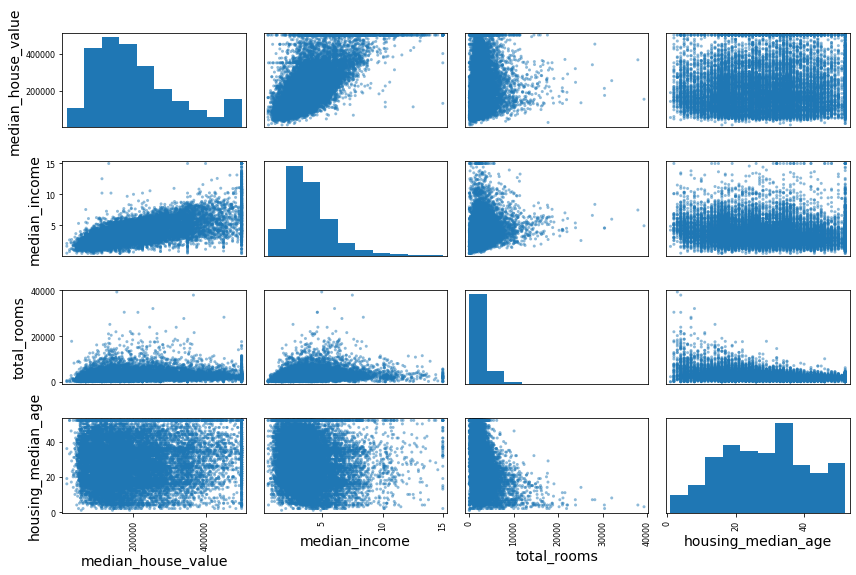

In [35]:
# from pandas.tools.plotting import scatter_matrix # 옛날 버전의 판다스에서는
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

---

- 중간 주택 가격을 예측하는 데 가장 유용할 것 같은 특성은 중간 소득이므로 상관관계 산점도를 확대합니다.
    - 상관관계가 매우 강합니다.(위쪽으로 향하는 경향을 볼 수 있으며 포인트들이 너무 널리 퍼져있지 않습니다.)
    - 앞서 본 가격 제한값이 $50,000에서 수평선으로 잘보입니다.
    - 다른 직선 부분도 450,000부분과 35,000등에서 살펴볼 수 있으므로 이상한 형태를 학습하지 않기 위해 이런 구역을 제거하는 것이 좋습니다.

그림 저장: income_vs_house_value_scatterplot


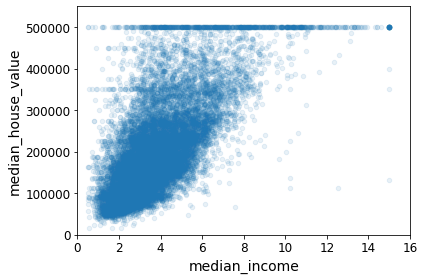

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

---
### <span style="color:royalblue">CHAPTER 2.4.3 특성 조합으로 실험</span>
- 지금까지 진행하는 과정 속에서 머신러닝 알고리즘에 주입하기 전에 정제해야 할 조금 이상한 데이터를 확인했고, 특성 사이에서 흥미로운 상관관계를 발견하였습니다.


- 머신러닝 알고리즘용 데이터를 준비하기 전에 여러 특성의 조합을 시도해봅니다.
    - 얼마나 많은 가구 수가 있는지 모른다면 방 개수의 정보는 유용하지 않듯이 진짜 중요한 것은 가구당 방 개수입니다.
    - 전체 침대 개수는 그 자체로 유용하지 않지만 방 개수당 침대 수는 유용할 수 있습니다.
    - 이와 마찬가지로 가구당 인원도 흥미로운 특성조합으로 보입니다.

In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

- 실제로 rooms_per_household와 bedrooms_per_room과 population_per_household를 적용해보았습니다.
    - bedrooms_per_room은 total_rooms와 total_bedrooms에 비해 상관관계가 훨씬높음을 볼 수 있습니다.
    - rooms_per_household도 마찬가지 결과임을 볼 수 있습니다.

---
## <span style="color:green">CHAPTER 2.5 머신러닝 알고리즘을 위한 데이터 준비</span>
머신러닝 알고리즘을 위해 데이터를 준비할 차례입니다.<br>
이 작업은 수동으로 하는 대신 함수를 만들어 자동화합니다.
- 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있습니다.(다음번에 새로운 데이터셋을 사용할때)
- 향후 프로젝트에 사용할 수 있는 변환  라이브러리를 점진적으로 구축하게됩니다.
- 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 변환시키는 데 이 함수를 사용할 수 있습니다.
- 여러 가지 데이터 변환을 쉽게 시도해볼수 있고 어떤 조합이 가장 좋은지 확인하는 데 편리합니다.
    
    
이 과정을 진행하기 위해, 원래 훈련 세트로 복원하고(strat_train_set을 다시 한번 복사), 예측 변수와 타깃값에 같은 변형을 적용하지 않기 위해 예측 변수와 레이블을 분리합니다.

In [38]:
housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

---
### <span style="color:royalblue">CHAPTER 2.5.1 데이터 정제</span>
- 머신러닝 알고리즘은 누락된 특성을 다루지 못합니다. 따라서, 이를 처리할 수 있는 함수를 만들겠습니다.


- 현재 진행중인 프로젝트의 total_bedrooms 특성에 값이 없는 경우를 보았습니다. 이를 고치는 방법은 3가지 입니다.
    - 해당 구역을 제거합니다.
    - 전체 특성을 삭제합니다.
    - 어떤 값으로 채웁니다.(0, 평균, 중간값 등)

In [39]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [40]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 옵션 1 : 해당 구역을 제거

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [41]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 옵션 2 : 전체 특성을 삭제

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [42]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # 옵션 3 : 중간값으로 대체

In [43]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


---

이러한 방식말고 사이킷런의 SimpleImputer을 이용해 누락된 값을 손쉽게 다루겠습니다.


- 누락된 값을 특성의 중간값으로 대체한다고 지정하여 SimpleImputer의 객체를 생성합니다.

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

- 중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성인 ocean_proximity를 제외한 데이터 복사본을 생성합니다.

In [45]:
housing_num = housing.drop("ocean_proximity", axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

- imputer 객체의 fit() 메서드를 사용해 훈련 데이터에 적용합니다.

In [46]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

- imputer는 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장하므로 이를 확인해봅니다.
- total_bedrooms 특성에만 누락된 값이 있지만 나중에 시스템이 서비스될 때 새로운 데이터에서 어떤 값이 누락될지 확신할 수 없으므로 모든 수치형 특성에 imputer를 적용하는 것이 바람직합니다.

In [47]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

- 실제 중간값과 같은지를 비교합니다.

In [48]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

- 학습된 imputer 객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꿀 수 있습니다.
    - 변형된 특성들이 들어있는 평범한 넘파이 배열이 됩니다.

In [49]:
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

- pandas의 DataFrame을 통해 원래 형태로 간단히 돌려준다.

In [50]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [51]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


---
### <span style="color:royalblue">CHAPTER 2.5.2 텍스트와 범주형 특성 다루기</span>
- 지금까지 다룬 특성은 수치형 특성으로, 이제부터 텍스트 특성을 살펴봅니다.
    - 여기선, ocean_proximity 하나뿐입니다.(이 텍스트는 임의의 텍스트가 아닌 각 값이 카테고리를 나타냅니다. 즉, 이 특성은 범주형 특성입니다.)

In [64]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


- 이 카테고리를  텍스트에서 숫자로 변환합니다.
    - 사이킷런의 OrdinalEncoder 클래스를 활용합니다.

In [53]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

- categories_ 인스턴스 변수를 사용해 카테고리 목록을 얻습니다.(범주형 특성마다 카테고리들의 1D 배열을 담은 리스트를 반환합니다.)

In [54]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- 이 방식의 문제점은 가까이 있는 두 값의 경우 떨어져 있는 두 값보다 더 비슷하다고 생각합니다.
    - 'bad', 'average', 'good', 'excellent'의 경우를 생각할 수 있습니다.
    
    
- 하지만 현재 진행중인 프로젝트에는 해당되지 않습니다.
    - 이 경우에는 카테고리별 이진 특성을 만들어 해결합니다.
    - 1H OCEAN일 때 한 특성이 1이고 그 외 나머지 특성은 0, INLAND일 때 다른 한 특성이 1 그 외 나머지 특성은 0이되는 원-핫 인코딩을 사용합니다.(한 특성만 1이고 나머지는 0)
    - 사이킷런은 범주의 값을 원-핫 벡터로 바꾸기 위한 OneHotEncoder 클래스를 제공합니다.
    
---

- 사이킷런의 OneHotEncoder 클래스를 통해 구현합니다.
- 출력을 보면 넘파이 배열이 아닌 사이파이 희소 행렬입니다.
    - 이는 수천 개의 카테고리가 있는 범주형 특성일 경우 매우 효율적입니다.
    - 이런 특성을 원-핫 인코딩하면 열이 수천 개인 행렬로 변하고 각 행은 1이 하나뿐이고 그 외에는 0로 채워져있습니다.
    - 0을 모두 메모리에 저장하는 것은 낭비이므로 희소 행렬은 0이 아닌 원소의 위치만 저장합니다.
 

In [55]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

 
- 넘파이 배열로 바꾸기 위해 toarray() 메서드를 호출하였습니다.

In [56]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

- 인코더의 categories_ 인스턴스 변수를 사용해 카테고리 리스트를 얻을 수 있습니다.

In [57]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

---
### <span style="color:royalblue">CHAPTER 2.5.3 나만의 변환기</span>
- 사이킷런이 유용한 변환기를 많이 제공하지만 특별한 정제 작업이나 어떤 특성들을 조합하는 등의 작업을 위해 자신만의 변환기를 만들어야 할 때가 있습니다.
- 내가 만든 변환기를 사이킷런의 기능과 매끄럽게 연동하고 싶을 것입니다.
- 사이킷런은 덕 타이핑을 지원하므로 fit(), transform(), fit_transform() 메서드를 구현한 파이썬 클래스를 만들면 됩니다.
    - 덕 타이핑은 상속이나 인터페이스 구현이 아니라 객체의 속성이나 메서드가  객체의 유형을 결정하는 방식입니다.
    - fit_transform() 메서드는 TransformerMixin을 상속하면 자동으로 생성됩니다.
    - BaseEstimator를 상속하면(생성자에 arg나 kargs를 사용하지않으면) 하이퍼 파라미터 튜닝에 필요한 두 메서드(get_params()와 set_params())를 얻게됩니다.
  
  
- 다음은 진행중인 프로젝트를 기반으로 rooms_per_household, population_per_household, bedrooms_per_room의 조합 특성을 추가하는 간단한 변환기입니다.

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] # rooms_per_household 생성 
        population_per_household = X[:, population_ix] / X[:, households_ix] # population_per_household 생성
        if self.add_bedrooms_per_room: # add_bedrooms_per_room의 값이 True일 경우 생성 후 총 3개 추가 아니라면, 2개만 추가
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [59]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


---
### <span style="color:royalblue">CHAPTER 2.5.4 특성 스케일링</span>
- 데이터에 적용할 가장 중요한 변환 중 하나가 특성 스케일링입니다.
- 몇 가지를 제외하고는(트리 기반 알고리즘 등), 머신러닝 알고리즘은 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않습니다.
- 모든 특성의 범위를 같도록 만들어주는 방법으로 min-max 스케일링과 표준화가 널리 사용됩니다.
    - min-max 스케일링은 많은 사람이 정규화라 부르는 것으로 0 ~ 1 범위에 들도록 값을 이동하고 스케일을 조정합니다.
        - 데이터에서 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나누면 이렇게 할 수 있습니다.
        - 사이킷런에는 이에 해당하는 MinMaxScaler 변환기를 제공합니다.(0 ~ 1 사이를 원하지 않는다면 feature_range 매개변수를 통해 범위를 변경할 수 있습니다.)
    - 표준화는 먼저 평균을 뺀 후(그래서 표준화를 하면 항상 평균이 0이 됩니다) 표준편차로 나누어 결과 분포의 분산이 1이 되도록 합니다. 
        - min-max 스케일링과는 달리 표준화는 범위의 상한과 하한이 없어 어떤 알고리즘에는 문제가 될 수 있습니다.
        - 이상치에 영향을 덜 받습니다.
        
        
- 모든 변환기에서 스케일링은 테스트  세트가 포함된 전체 데이터가 아니고 훈련 데이터에 대해서만 fit() 메서드를 적용해야 합니다. 그런 다음 훈련 세트와 테스트 세트(그리고 새로운 데이터)에 대해 transform() 메서드를 사용합니다.

---
### <span style="color:royalblue">CHAPTER 2.5.5 변환 파이프라인</span>
- 앞서 과정에서 볼 수 있듯이, 변환 단계가 많으며 정확한 순서대로 실행되어야 합니다.
- 사이킷런에는 연속된 변환을 순서대로 처리할 수 있도록 도와주는 pipeline 클래스가 존재합니다.

---
- 이는 숫자 특성을 처리하는 간단한 파이프라인입니다.
    - pipeline은 연속된 단계를 나타내는 이름/ 추정기 쌍의 목록을 입력으로 받습니다.
    - 마지막 단계에는 변환기와 추정기를 모두 사용할 수 있지만, 그 외에는 모두 변환기여야 합니다.(fit_transform을 가지고 있어야합니다.)
        - 추정기란, 데이터셋을 기반으로 일련의 모델 파라미터들을 추정하는 객체입니다.
        - 변환기란, 데이터셋을 변환하는 추정기를 변환기라고 합니다.
    - 이름은 __를 포함하지않는다면 상관없습니다. 
    

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [61]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

---

- 지금까지 범주형 열과 수치형 열을 각각 다루었습니다.
- 하나의 변환기로 각 열마다 적절한 변환을 적용하여 모든 열을 처리할 수 있다면 더 편리할 것입니다.
- 이런 기능을 위해 ComlumnTransformer가 추가되었습니다.(이는 pandas DataFrame과 잘 동작합니다.)
   - 이 생성자는 튜플의 리스트를 받습니다.
   - 각 튜플은 이름, 변환기, 변환기가 적용될 열 이름(또는 인덱스)의  리스트로 이루어집니다.<br>여기서 수치형 열은 num_pipeline을 사용하여 변환되고 범주형 열은 OneHotEncoder을 사용해 변환됩니다.
   - 그 후, 주택 데이터에 이를 적용합니다.
   - OneHotEncoder는 희소 행렬을 반환하지만, num_pipeline는 밀집 행렬을 반환합니다.<br> 희소행렬과 밀집 행렬이 섞여 있을 때, ColumnTransformer는 최종 행렬의 밀집 정도를 추정합니다.<br>(0이 아닌 원소의 비율) 밀집도가 임곗값보다 낮으면 희소 행렬이고 아니라면 밀집 행렬이 반환됩니다.<br> 이 프로젝트의 경우 밀집 행렬을 반환합니다.

In [62]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)

In [63]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])